In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os as os

In [2]:
os.chdir(r"./Data")
df = pd.read_csv("pd_speech_features.csv")
os.chdir("..")

In [3]:
df = df.groupby(by=df.id).mean()

In [4]:
df_y = df["class"]
df = df.drop("class", axis=1)

In [5]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_validate
from sklearn.metrics import f1_score, accuracy_score

In [6]:
clf = RandomForestClassifier(max_depth=5, n_estimators=1000)

results = cross_validate(clf, df, df_y, scoring=["accuracy", "f1"])

In [7]:
print("Accuracy: " + str(results["test_accuracy"]))
print("F1: " + str(results["test_f1"]))

Accuracy: [0.80392157 0.84313725 0.88       0.86       0.78      ]
F1: [0.87804878 0.9047619  0.925      0.91358025 0.86075949]


In [8]:
clf.fit(df, df_y)

RandomForestClassifier(max_depth=5, n_estimators=1000)

<AxesSubplot: >

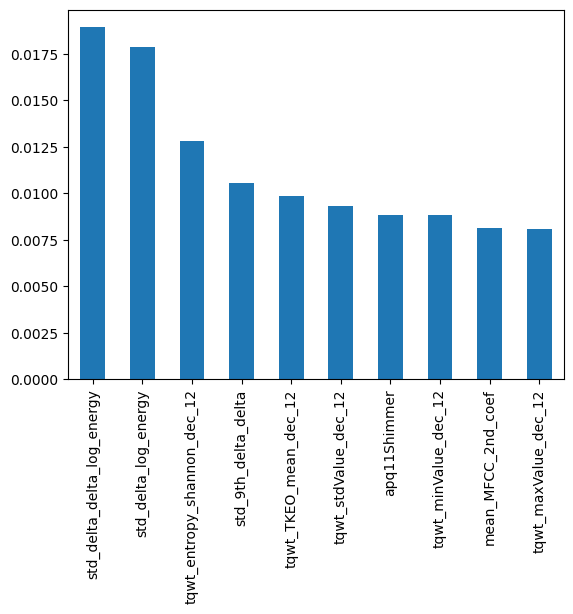

In [9]:
feature_imp = pd.Series(clf.feature_importances_, index=df.columns).sort_values(ascending=False)

feature_imp.head(n=10).plot.bar()